In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import math as math
from scipy.stats import boxcox
from random import randrange
from random import seed
from random import random
from random import gauss

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [71]:
df = pd.read_csv("https://raw.githubusercontent.com/shauryashivam/commodity-futures/main/Dataset/Gold5.csv?token=AMF2Z3LBLLFT62EDL6NOAGDARINHK",header=0, index_col=0, parse_dates=True,
squeeze=True)

In [4]:
df.drop(columns=['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)

In [5]:
df.head()

,Close
Date,
2016-01-04,1075.099976
2016-01-05,1078.400024
2016-01-06,1091.900024
2016-01-07,1107.699951
2016-01-08,1097.800049


In [6]:
df.describe()

,Close
count,1246.000000
mean,1388.680578
std,217.880280
min,1073.900024
25%,1249.000000
50%,1299.400024
75%,1482.649963
max,2051.500000


# Single Lag

In [7]:
var = pd.DataFrame(df.values)
dataframe = pd.concat([var.shift(1), var], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

             t          t+1
0          NaN  1075.099976
1  1075.099976  1078.400024
2  1078.400024  1091.900024
3  1091.900024  1107.699951
4  1107.699951  1097.800049


In [8]:
var = pd.DataFrame(df.values)
dataframe = pd.concat([var.shift(3), var.shift(2), var.shift(1), var], axis=1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']
print(dataframe.head(5))

           t-2          t-1            t          t+1
0          NaN          NaN          NaN  1075.099976
1          NaN          NaN  1075.099976  1078.400024
2          NaN  1075.099976  1078.400024  1091.900024
3  1075.099976  1078.400024  1091.900024  1107.699951
4  1078.400024  1091.900024  1107.699951  1097.800049


In [9]:
var = pd.DataFrame(df.values)
shifted = var.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = pd.concat([means, var], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)          t+1
0          NaN  1075.099976
1          NaN  1078.400024
2  1076.750000  1091.900024
3  1085.150024  1107.699951
4  1099.799988  1097.800049


In [10]:
var = pd.DataFrame(df.values)
window = var.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), var.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

           min         mean          max          t+1
0  1075.099976  1075.099976  1075.099976  1078.400024
1  1075.099976  1076.750000  1078.400024  1091.900024
2  1075.099976  1081.800008  1091.900024  1107.699951
3  1075.099976  1088.274994  1107.699951  1097.800049
4  1075.099976  1090.180005  1107.699951  1096.500000


In [11]:
dataframe = pd.DataFrame()
dataframe['month'] = [df.index[i].month for i in range(len(df))]
dataframe['day'] = [df.index[i].day for i in range(len(df))]
dataframe['Close'] = [df['Close'] for i in range(len(df))]
print(dataframe.head(5))

   month  day                                              Close
0      1    4  Date
2016-01-04    1075.099976
2016-01-05    1...
1      1    5  Date
2016-01-04    1075.099976
2016-01-05    1...
2      1    6  Date
2016-01-04    1075.099976
2016-01-05    1...
3      1    7  Date
2016-01-04    1075.099976
2016-01-05    1...
4      1    8  Date
2016-01-04    1075.099976
2016-01-05    1...


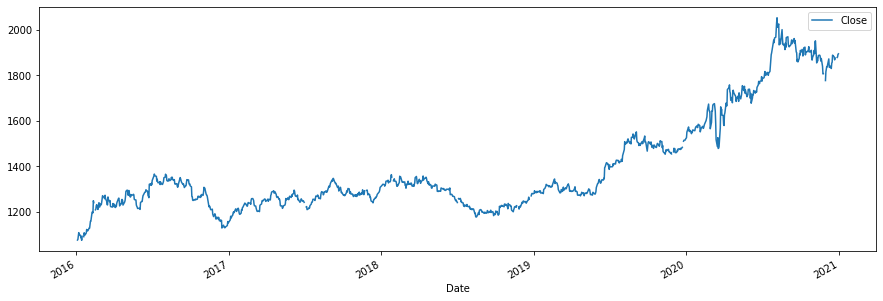

In [12]:

df.plot(figsize=(15,5))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


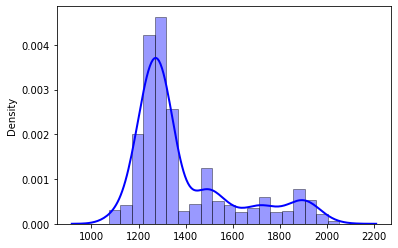

In [13]:
import seaborn as sns
sns.distplot(df, hist=True, kde=True,
             bins=20,              
             color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})


In [14]:
df.head(
)

,Close
Date,
2016-01-04,1075.099976
2016-01-05,1078.400024
2016-01-06,1091.900024
2016-01-07,1107.699951
2016-01-08,1097.800049


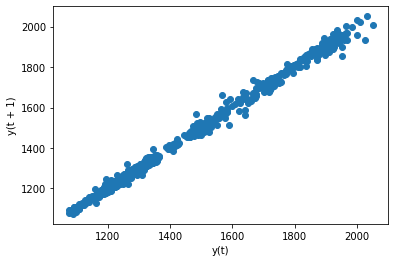

In [16]:
lag_plot(df)
pyplot.show()

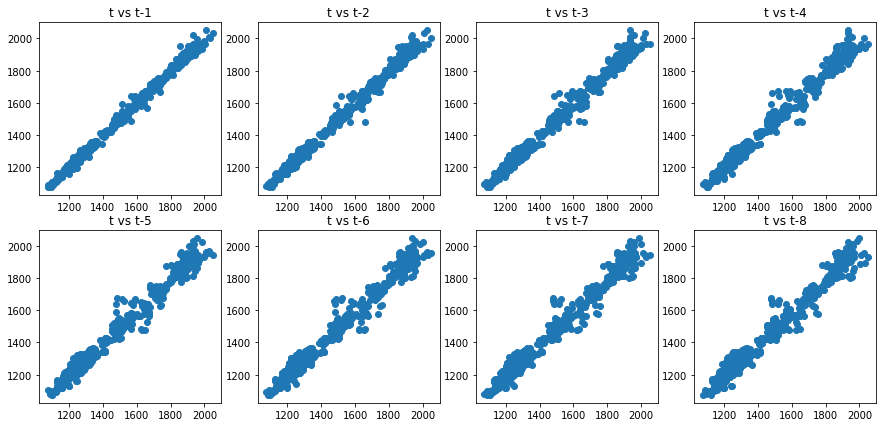

In [17]:
values = pd.DataFrame(df.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1,figsize=(15,7))
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

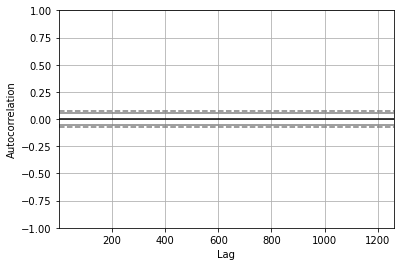

In [18]:
autocorrelation_plot(df)

In [19]:
df=df.fillna(df.mean())

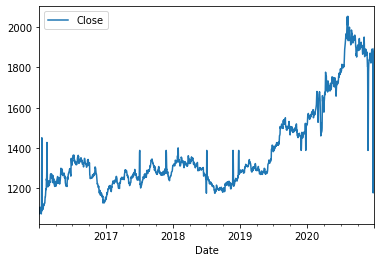

In [23]:
upsampled = df.resample('D').mean()
interpolated = upsampled.interpolate(method='quadratic')
interpolated.plot()

In [24]:
pip install mxnet


     |████████████████████████████████| 46.9MB 98kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [25]:
import time
import numpy as np

from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import accuracy_score

In [26]:
df.describe()

,Close
count,1259.000000
mean,1388.680578
std,216.751584
min,1073.900024
25%,1249.250000
50%,1301.500000
75%,1481.849976
max,2051.500000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.15, random_state=42)


In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv1D(kernel_size=64,filters=3*3,strides=1,activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

In [ ]:
model.summary()

# BUILDING MODEL 

## LSTM-GRU


In [66]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(5,activation = 'relu', input_shape=(1,1)))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam',metrics=['mae'])


## LSTM CNN Attention

In [31]:
!pip install keras-attention
!pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.49.0-cp37-none-any.whl size=19468 sha256=08334fe68e10170a4bbd13359e0d4d4d6d9b2a891df99e311412a43047eb7aff
  Stored in directory: /root/.cache/pip/wheels/6f/9d/c5/26693a5092d9313daeae94db04818fc0a2b7a48ea381989f34
Successfully built keras-self-attention


In [67]:
import os
import time
import warnings
import numpy as np
import pandas as pd
import operator
from functools import reduce
import h5py
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Convolution1D, MaxPooling1D, Flatten,  Embedding,Bidirectional, GRU
from keras.layers import Conv1D, GlobalMaxPooling1D, merge
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras_self_attention import SeqSelfAttention
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


In [47]:
def create_dataset(dataset, look_back=1, columns = ['Close']):
    dataX, dataY = [], []
    for i in range(len(dataset.index)):
        if i < look_back:
            continue
        a = None
        for c in columns:
            b = dataset.loc[dataset.index[i-look_back:i], c].to_numpy() 
            if a is None:
                a = b
            else:
                a = np.append(a,b)
        dataX.append(a)
        dataY.append(dataset.loc[dataset.index[i-look_back], columns].to_numpy())
    return np.array(dataX), np.array(dataY)

Date
2016-01-04   -1.447303e+00
2016-01-05   -1.432072e+00
2016-01-06   -1.369764e+00
2016-01-07   -1.296841e+00
2016-01-08   -1.342533e+00
                  ...     
2020-12-24   -8.203802e-15
2020-12-28    2.254717e+00
2020-12-29    2.266256e+00
2020-12-30    2.318410e+00
2020-12-31    2.328102e+00
Name: Close, Length: 1259, dtype: float64
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 7, 6)              162       
_________________________________________________________________
Attention (SeqSelfAttention) (None, None, 6)           449       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 64)          832       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, None, 64)          0         
_______________________________________

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The RMSE is  7.236283e-01
The RMAE is  7.819518e-01
The MAPE is  1.353704e+14


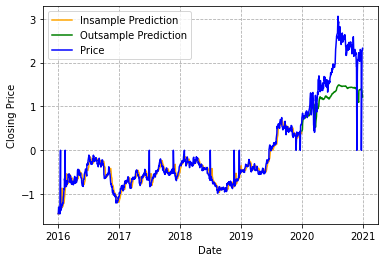

In [68]:
look_back = 7 # 10, 13
sc = StandardScaler()  
df.loc[:, 'Close'] = sc.fit_transform(df.Close.values.reshape(-1,1)) # fit.transform()
print(df.loc[:, 'Close'])

# Create training data
#train_df = df.loc[df.index < pd.to_datetime('2010-01-01')]
train_df = df.loc[df.index < df.index[int(len(df.index)*0.8)]]
train_x, train_y = create_dataset(train_df, look_back=look_back)


# Construct the whole LSTM + CNN
model = Sequential()
# LSTM
model.add(GRU(6,input_shape = (look_back, 1), input_dim=1 ,   return_sequences=True))

#model.add(LSTM(input_shape = (look_back,1), input_dim=1, output_dim=6, return_sequences=True))
#model.add(Dense(1))
#model.add(Activation('relu')) # ReLU : y = max(0,x)

# Attention Mechanism
model.add(SeqSelfAttention(attention_activation='sigmoid', name='Attention'))

# CNN
model.add(Convolution1D(input_shape = (look_back,1),
                        filters=64,# 32,128
                       kernel_size=2,
                       activation='relu',
                        ))
#model.add(MaxPooling1D(pool_length=2)) 

'''model.add(Convolution1D(input_shape = (look_back,1),
                        nb_filter=64,
                        filter_length=2,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))'''
model.add(MaxPooling1D(pool_size=(2)))

model.add(Dropout(0.25))

#model.add(Dense(250)) 
#model.add(Dropout(0.25,input_shape=(2,)))
model.add(Activation('relu')) # ReLU : y = max(0,x)
model.add(Dense(1))
model.add(Activation('linear')) # Linear : y = x

# Print whole structure of the model
print(model.summary())

# training the train data with n epoch
model.compile(loss="mse", optimizer="adam") # adam, rmsprop
result = model.fit(np.atleast_3d(np.array(train_x)),
          np.atleast_3d(train_y),
          epochs=100,
          batch_size=80, verbose=1, shuffle=False)


with open('data_lstm_attention_cnn_palladium.txt','w') as f:
    f.write(str(result.history))

model.save('lstm_attention_cnn_palladium.h5')


# Make prediction and specify on the line chart
predictors = ['Close']
df['Pred'] = df.loc[df.index[0], 'Close']
for i in range(len(df.index)):
    if i < look_back:
        continue
    a = None
    for c in predictors:
        b = df.loc[df.index[i-look_back:i], c].to_numpy()
        if a is None:
            a = b
        else:
            a = np.append(a,b)
        a = a
    y = model.predict(a.reshape(1,look_back*len(predictors),1)) 
    df.loc[df.index[i], 'Pred']=y[0][0]

df.loc[:, 'Close'] = sc.inverse_transform(df.loc[:, 'Close']) 
df.loc[:, 'Pred'] = sc.inverse_transform(df.loc[:, 'Pred'])

def mape(y_true, y_pred):
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred) / y_true)) / n * 100
    return mape

# present the line chart and some parameters like MSE, which reflects the accuracy of the model in sample or out sample
plt.grid(ls='--')
plt.plot(df.loc[df.index < df.index[int(len(df.index)*0.8)], 'Pred'], 'orange', label = 'Insample Prediction')
plt.plot(df.loc[df.index >= df.index[int(len(df.index)*0.8)], 'Pred'], 'g', label = 'Outsample Prediction')
plt.plot(df.Close ,'b', label = 'Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
#print('%e'%mean_squared_error(df.loc[df.index < pd.to_datetime('2010-01-01'),'Close'],df.loc[df.index < pd.to_datetime('2010-01-01'),'Pred']))
#print('%e'%mean_squared_error(df.loc[df.index >= pd.to_datetime('2010-01-01'),'Close'],df.loc[df.index >= pd.to_datetime('2010-01-01'),'Pred']))
print('The RMSE is ','%e'%sqrt(mean_squared_error(df.loc[df.index >= df.index[int(len(df.index)*0.8)], 'Close'], df.loc[df.index >= df.index[int(len(df.index)*0.8)], 'Pred'])))
print('The RMAE is ','%e'%sqrt(mean_absolute_error(df.loc[df.index >= df.index[int(len(df.index)*0.8)], 'Close'], df.loc[df.index >= df.index[int(len(df.index)*0.8)], 'Pred'])))
print('The MAPE is ','%e'%mape(df.loc[df.index >= df.index[int(len(df.index)*0.8)], 'Close'], df.loc[df.index >= df.index[int(len(df.index)*0.8)], 'Pred']))

plt.legend()
plt.savefig("lstm_attention_cnn_palladium.eps", format='eps', dpi=1000)
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


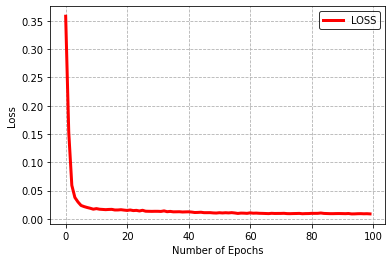

In [69]:

# sketch loss
#plt.cla() # clear the axis
plt.grid(ls='--')
plt.plot(result.epoch,result.history['loss'],label='LOSS',c='r',lw=3)
#plt.scatter(result.epoch,result.history['loss'],s=15,c='r')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right', frameon=True, edgecolor='black')
plt.savefig("LC_loss.eps", format='eps', dpi=1000)
plt. close(0)
